In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

# Webcraping packages
import requests
from bs4 import BeautifulSoup
from time import sleep
from datetime import datetime

from selenium import webdriver

## Imports

### NFL

In [2]:
# Overall Team Data
team_df1 = pd.read_csv('../data/teams_2019_2015.csv')
team_df2 = pd.read_csv('../data/teams_2014_1970.csv')

In [3]:
# Passing Data
pass_df1 = pd.read_csv('../data/pass_2019_2015.csv')
pass_df2 = pd.read_csv('../data/pass_2014_1970.csv')

In [4]:
# Rushing Data
rush_df = pd.read_csv('../data/rush_stats.csv')

In [5]:
# Defense Data
def_df = pd.read_csv('../data/defensive_stats.csv')

### College

In [6]:
college_stand_df = pd.read_csv('../data/college_standings_2019_1996.csv')

In [7]:
college_off_df = pd.read_csv('../data/college_offense_stats_2019_1996.csv')

In [8]:
college_def_df = pd.read_csv('../data/college_defense_stats_2019_1996.csv')

## Combining Data

### Stacked Concatenation

In [9]:
# Multiyear DataFrames - Stacking them dfs upon each other
team_df = pd.concat([team_df1, team_df2], index=True)
pass_df = pd.concat([pass_df1, pass_df2], index=True)

### Merging DataFrames

### NFL Stats

In [10]:
# Merging team & passsing DataFrames
df1 = pd.merge(team_df, pass_df, left_on=['team','year'], right_on=['team','year'])
df1.shape

(1477, 34)

* I am merging all of the passing stats with the team stats DataFrame by the team name & year so that the stats match up.

In [11]:
df2 = pd.merge(df1, rush_df, left_on=['team','year'], right_on=['team','year'])
df2.shape

(1477, 43)

* Performing the same merge with the previously merged DataFrame, but with the rushing stats.

In [12]:
df = pd.merge(df2, def_df, left_on=['team','year'], right_on=['team','year'])
df.shape

(1477, 69)

* Performing the same merge with the previously merged DataFrame, but with the defensive stats. I now have one master DataFrame, that includes all of the statistics together, per team and year, that I can perform my analysis on.

In [13]:
df.drop(columns='game_y', inplace=True)

In [14]:
df.rename(columns={'game_x':'game'}, inplace=True)

* Removing duplicate game columns, because we only need one column that shows this statistic.

In [15]:
df.shape

(1477, 68)

In [16]:
df.head(2)

,team,year,wins,losses,ties,win_loss_perc,points_scored,opp_points,points_diff,margin_of_victory,...,opp_rush_yds,opp_rush_td,opp_rush_y/a,opp_rush_1stD,def_pen,def_pen_yds,def_pen_1stD,opp_score_pct,turnover_pct,def_exp
0,New England Patriots,2019,8,1,0.0,0.889,270,98,172,19.1,...,892,5,4.7,38,59,510,21,11.4,21.9,162.44
1,Buffalo Bills,2019,6,3,0.0,0.667,174,150,24,2.7,...,1040,9,4.5,54,56,463,14,23.8,9.9,14.81


In [17]:
current_NFL = df[(df['year'] > 2013) & (df['year'] < 2019)]

* Selecting 5 NFL years between 2014 - 2018 to be used in my recommender data. I want to use more recent years because teams looks different over the course of years because of player and coaching turnover, along with other factors. 
* I am not including 2019, because as of now (November 2019) the season is still under way and I want to use full season data.

### College Football Stats

In [18]:
cdf1 = pd.merge(college_stand_df, college_off_df, left_on=['School','year'], right_on=['School','year'])
cdf1.shape

(2428, 42)

* Merging the College offensive DataFrame upon the overall College Standings DataFrame by the school and year.

In [19]:
cdf = pd.merge(cdf1, college_def_df, left_on=['School','year'], right_on=['School','year'])
cdf.shape

(2428, 66)

* Merging the College Defensive stats upon the previously merged DataFrame for one master.

In [20]:
cdf.head(2)

,Rk,School,Conf,W,L,Pct,W.1,L.1,Pct.1,Off,...,opp_Avg_Yds,opp_1st_down_Pass,opp_1st_down_Rush,opp_1st_down_Pen,opp_1st_down_Tot,opp_pen_No.,opp_pen_Yds,opp_Fum,opp_Int,opp_TO_Tot
0,1,Clemson,ACC (Atlantic),11,0,1.0,8.0,0.0,1.0,45.9,...,3.9,5.0,5.6,1.2,11.8,5.5,51.7,1.0,1.2,2.2
1,2,Wake Forest,ACC (Atlantic),7,3,0.7,3.0,3.0,0.5,32.4,...,5.8,11.4,8.1,1.2,20.7,6.2,52.9,0.8,1.0,1.8


In [21]:
current_College = cdf[(cdf['year'] > 2013) & (cdf['year'] < 2019)]

In [22]:
current_College.columns

Index(['Rk', 'School', 'Conf', 'W', 'L', 'Pct', 'W.1', 'L.1', 'Pct.1', 'Off',
       'Def', 'SRS', 'SOS', 'AP Pre', 'AP High', 'AP Rank', 'Notes', 'year',
       'off_Rk', 'G_x', 'Pts', 'pass_cmp', 'pass_Att', 'cmp_Pct', 'pass_Yds',
       'pass_TD', 'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD', 'Plays',
       'Yds', 'Avg_Yds', '1st_down_Pass', '1st_down_Rush', '1st_down_Pen',
       '1st_down_Tot', 'pen_No.', 'pen_Yds', 'Fum', 'Int', 'TO_Tot', 'def_Rk',
       'G_y', 'opp_Pts', 'opp_cmp', 'opp_pass_Att', 'opp_cmp_Pct',
       'opp_ass_Yds', 'opp_pass_TD', 'opp_rush_Att', 'opp_rush_Yds',
       'opp_rush_Avg', 'opp_rush_TD', 'opp_Plays', 'opp_Yds', 'opp_Avg_Yds',
       'opp_1st_down_Pass', 'opp_1st_down_Rush', 'opp_1st_down_Pen',
       'opp_1st_down_Tot', 'opp_pen_No.', 'opp_pen_Yds', 'opp_Fum', 'opp_Int',
       'opp_TO_Tot'],
      dtype='object')

In [23]:
current_NFL.columns

Index(['team', 'year', 'wins', 'losses', 'ties', 'win_loss_perc',
       'points_scored', 'opp_points', 'points_diff', 'margin_of_victory',
       'SoS', 'SRS', 'OSRS', 'DSRS', 'game', 'comp', 'attempts', 'comp_perc',
       'pass_yards', 'pass_tds', 'pass_td_perc', 'int', 'int_perc',
       'pass_long', 'pass_y/a', 'y/c', 'pass_y/g', 'QB_rate', 'sacks',
       'sack_yds', 'sack_perc', 'qb_comebacks', 'qb_gwd', 'pass_exp',
       'rush_att', 'rush_yards', 'rush_tds', 'rush_long', 'rush_y/a',
       'rush_y/g', 'fumbles', 'rush_exp', 'game', 'points_allow', 'opp_yards',
       'opp_plays', 'opp_y/p', 'turnover', 'opp_fumb', 'opp_1stD', 'opp_comp',
       'opp_pass_att', 'opp_pass_yds', 'opp_pass_td', 'def_int', 'opp_Ny/a',
       'opp_pass_1stD', 'opp_rush_att', 'opp_rush_yds', 'opp_rush_td',
       'opp_rush_y/a', 'opp_rush_1stD', 'def_pen', 'def_pen_yds',
       'def_pen_1stD', 'opp_score_pct', 'turnover_pct', 'def_exp'],
      dtype='object')

In [24]:
col_drop = ['ties','opp_points','points_diff', 'margin_of_victory', 'OSRS', 'DSRS', 'pass_td_perc',
           'int_perc', 'pass_long','pass_yards','pass_y/a', 'y/c', 'QB_rate', 'sacks',
            'sack_yds', 'sack_perc', 'qb_comebacks', 'qb_gwd', 'pass_exp', 
           'rush_long', 'rush_yards','rush_y/a', 'rush_exp','opp_Ny/a', 'opp_pass_1stD',
            'opp_rush_y/a' ,'opp_1stD', 'opp_pass_1stD', 'opp_rush_1stD', 'def_pen', 
            'def_pen_yds', 'def_pen_1stD', 'opp_score_pct', 'turnover_pct', 'def_exp']
current_NFL = current_NFL.drop(columns=col_drop).copy()

In [25]:
current_NFL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 32 to 191
Data columns (total 34 columns):
team             160 non-null object
year             160 non-null int64
wins             160 non-null int64
losses           160 non-null int64
win_loss_perc    160 non-null float64
points_scored    160 non-null int64
SoS              160 non-null float64
SRS              160 non-null float64
game             160 non-null int64
comp             160 non-null int64
attempts         160 non-null int64
comp_perc        160 non-null float64
pass_tds         160 non-null int64
int              160 non-null int64
pass_y/g         160 non-null float64
rush_att         160 non-null int64
rush_tds         160 non-null int64
rush_y/g         160 non-null float64
fumbles          160 non-null int64
game             160 non-null int64
points_allow     160 non-null int64
opp_yards        160 non-null int64
opp_plays        160 non-null int64
opp_y/p          160 non-null float64
turnover       

In [26]:
col_drop2 = ['Rk','W.1', 'L.1', 'Pct.1','AP Pre', 'AP High', 'AP Rank', 'Notes', 'off_Rk','Pts',
            '1st_down_Pass', '1st_down_Rush', '1st_down_Pen', '1st_down_Tot', 'pen_No.', 'pen_Yds', 'def_Rk', 'G_y',
            'opp_Pts', 'opp_1st_down_Pass', 'opp_1st_down_Rush', 'opp_1st_down_Pen',
       'opp_1st_down_Tot', 'opp_pen_No.', 'opp_pen_Yds']
current_College = current_College.drop(columns=col_drop2).copy()

Dropping the columns that I don't need moving forward. This is mainly determined by what columns are not included in the NFL DataFrame.

In [27]:
current_College.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 129 to 767
Data columns (total 41 columns):
School          639 non-null object
Conf            639 non-null object
W               639 non-null int64
L               639 non-null int64
Pct             639 non-null float64
Off             639 non-null float64
Def             639 non-null float64
SRS             639 non-null float64
SOS             639 non-null float64
year            639 non-null int64
G_x             639 non-null int64
pass_cmp        639 non-null float64
pass_Att        639 non-null float64
cmp_Pct         639 non-null float64
pass_Yds        639 non-null float64
pass_TD         639 non-null float64
rush_Att        639 non-null float64
rush_Yds        639 non-null float64
rush_Avg        639 non-null float64
rush_TD         639 non-null float64
Plays           639 non-null float64
Yds             639 non-null float64
Avg_Yds         639 non-null float64
Fum             639 non-null float64
Int            

* To make sure both the NFL & college DataFrames have common columns I will drop columns that does not exist in both from the NFL.

## EDA

### NFL
---

In [28]:
current_NFL['comp']

32     378
33     292
34     271
35     299
36     334
      ... 
187    301
188    287
189    320
190    292
191    327
Name: comp, Length: 160, dtype: int64

In [29]:
nfl_per_cols = ['comp', 'attempts','pass_tds','int','rush_att','rush_tds','fumbles',
                'points_allow','opp_yards','opp_plays','turnover','opp_fumb','opp_comp','opp_pass_att',
                'opp_pass_yds','opp_pass_td','def_int','opp_rush_att','opp_rush_yds','opp_rush_td']

This list of columns will be the list of columns that I want to apply the per game average to.

In [30]:
current_NFL = current_NFL.apply(lambda x: x/16 if x.name in nfl_per_cols else x)

Recalculating each column to a per game basis by dividing by the number of games the NFL plays. I am doing this to properly match the stats with the college DataFrame. All of the stats in that DataFrame is on a per game basis. This helps because since both platforms plays a different amount of games, they will be compared on a similar level.

In [31]:
# 'rush_att','rush_tds','fumbles','points_allow','opp_yards','opp_plays','turnover','opp_fumb','opp_comp','opp_pass_att','opp_pass_yds','opp_pass_td','def_int','opp_rush_att','opp_rush_yds','opp_rush_td'

In [32]:
current_NFL.columns

Index(['team', 'year', 'wins', 'losses', 'win_loss_perc', 'points_scored',
       'SoS', 'SRS', 'game', 'comp', 'attempts', 'comp_perc', 'pass_tds',
       'int', 'pass_y/g', 'rush_att', 'rush_tds', 'rush_y/g', 'fumbles',
       'game', 'points_allow', 'opp_yards', 'opp_plays', 'opp_y/p', 'turnover',
       'opp_fumb', 'opp_comp', 'opp_pass_att', 'opp_pass_yds', 'opp_pass_td',
       'def_int', 'opp_rush_att', 'opp_rush_yds', 'opp_rush_td'],
      dtype='object')

In [36]:
current_NFL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 32 to 191
Data columns (total 34 columns):
team             160 non-null object
year             160 non-null int64
game             160 non-null int64
game             160 non-null int64
wins             160 non-null int64
losses           160 non-null int64
win_loss_perc    160 non-null float64
points_scored    160 non-null int64
points_allow     160 non-null float64
SRS              160 non-null float64
SoS              160 non-null float64
comp             160 non-null float64
attempts         160 non-null float64
comp_perc        160 non-null float64
pass_y/g         160 non-null float64
pass_tds         160 non-null float64
rush_att         160 non-null float64
rush_y/g         160 non-null float64
rush_tds         160 non-null float64
fumbles          160 non-null float64
int              160 non-null float64
opp_comp         160 non-null float64
opp_pass_att     160 non-null float64
opp_pass_yds     160 non-null flo

Further processing of columns to line up to the college DataFrame

In [67]:
# drop extra game column
current_NFL = current_NFL.loc[:, ~current_NFL.columns.duplicated()]
# combine turnovers - offensive
current_NFL['TO_Tot'] = current_NFL['fumbles'] + current_NFL['int']
# create a opponent completion percent category
current_NFL['opp_comp_Pct'] = current_NFL['opp_comp'] / current_NFL['opp_pass_att']

* Dropped the multipled game column.
* Created a total turnover column for offense.
* Created an opponent completion percentage column.

In [69]:
col_order = ['team', 'year','game','wins', 'losses', 'win_loss_perc', 'points_scored',
             'points_allow','SRS', 'SoS','comp', 'attempts', 'comp_perc',
             'pass_y/g','pass_tds','rush_att','rush_y/g','rush_tds','fumbles','int','TO_Tot',
             'opp_comp','opp_pass_att','opp_comp_Pct','opp_pass_yds','opp_pass_td', 
             'opp_rush_att', 'opp_rush_yds','opp_rush_td','opp_plays','opp_yards',
             'opp_y/p','opp_fumb','def_int','turnover']

In [70]:
current_NFL = current_NFL[col_order]

In [71]:
current_NFL.head()

,team,year,game,wins,losses,win_loss_perc,points_scored,points_allow,SRS,SoS,...,opp_pass_td,opp_rush_att,opp_rush_yds,opp_rush_td,opp_plays,opp_yards,opp_y/p,opp_fumb,def_int,turnover
32,New England Patriots,2018,16,11,5,0.688,436,20.3125,5.2,-1.8,...,1.8125,22.9375,112.6875,0.4375,62.6250,359.1250,5.7,0.6250,1.1250,1.7500
33,Miami Dolphins,2018,16,7,9,0.438,319,27.0625,-8.8,-1.7,...,1.9375,30.3125,145.3125,1.0625,64.0000,391.0625,6.1,0.4375,1.3125,1.7500
34,Buffalo Bills,2018,16,6,10,0.375,269,23.3750,-6.9,-0.3,...,1.3750,27.5000,114.9375,1.0625,60.5000,294.1250,4.9,0.6875,1.0000,1.6875
35,New York Jets,2018,16,4,12,0.250,333,27.5625,-7.8,-1.1,...,1.8125,27.5000,126.3125,1.0000,66.3125,380.3750,5.7,0.4375,0.8125,1.2500
36,Baltimore Ravens,2018,16,10,6,0.625,389,17.9375,7.0,0.6,...,1.3125,22.1250,82.9375,0.6875,60.8750,292.9375,4.8,0.3125,0.7500,1.0625


In [72]:
current_NFL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 32 to 191
Data columns (total 35 columns):
team             160 non-null object
year             160 non-null int64
game             160 non-null int64
wins             160 non-null int64
losses           160 non-null int64
win_loss_perc    160 non-null float64
points_scored    160 non-null int64
points_allow     160 non-null float64
SRS              160 non-null float64
SoS              160 non-null float64
comp             160 non-null float64
attempts         160 non-null float64
comp_perc        160 non-null float64
pass_y/g         160 non-null float64
pass_tds         160 non-null float64
rush_att         160 non-null float64
rush_y/g         160 non-null float64
rush_tds         160 non-null float64
fumbles          160 non-null float64
int              160 non-null float64
TO_Tot           160 non-null float64
opp_comp         160 non-null float64
opp_pass_att     160 non-null float64
opp_comp_Pct     160 non-null f

I now have all of the columns of interest in the proper format and order. I can proceed forward with the college data processing.
* Also adding a final column to specify each team being from the NFL.

In [73]:
current_NFL['League'] = 'NFL'

### College
---

In [40]:
col_drop_extra = ['Conf','rush_Avg','Plays','Yds','Avg_Yds','opp_rush_Avg']
current_College = current_College.drop(columns=col_drop_extra).copy()

Needing to drop unneccesary columns

In [41]:
current_College.columns

Index(['School', 'W', 'L', 'Pct', 'Off', 'Def', 'SRS', 'SOS', 'year', 'G_x',
       'pass_cmp', 'pass_Att', 'cmp_Pct', 'pass_Yds', 'pass_TD', 'rush_Att',
       'rush_Yds', 'rush_TD', 'Fum', 'Int', 'TO_Tot', 'opp_cmp',
       'opp_pass_Att', 'opp_cmp_Pct', 'opp_ass_Yds', 'opp_pass_TD',
       'opp_rush_Att', 'opp_rush_Yds', 'opp_rush_TD', 'opp_Plays', 'opp_Yds',
       'opp_Avg_Yds', 'opp_Fum', 'opp_Int', 'opp_TO_Tot'],
      dtype='object')

In [42]:
col_order_coll = ['School', 'year','G_x','W', 'L', 'Pct', 'Off', 'Def', 'SRS', 'SOS',
       'pass_cmp', 'pass_Att', 'cmp_Pct', 'pass_Yds', 'pass_TD', 'rush_Att',
       'rush_Yds', 'rush_TD', 'Fum', 'Int', 'TO_Tot', 'opp_cmp',
       'opp_pass_Att', 'opp_cmp_Pct', 'opp_ass_Yds', 'opp_pass_TD',
       'opp_rush_Att', 'opp_rush_Yds', 'opp_rush_TD', 'opp_Plays', 'opp_Yds',
       'opp_Avg_Yds', 'opp_Fum', 'opp_Int', 'opp_TO_Tot']

In [43]:
current_College = current_College[col_order_coll]

Reordering columns to match with the NFL's order.

In [44]:
current_College.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 129 to 767
Data columns (total 35 columns):
School          639 non-null object
year            639 non-null int64
G_x             639 non-null int64
W               639 non-null int64
L               639 non-null int64
Pct             639 non-null float64
Off             639 non-null float64
Def             639 non-null float64
SRS             639 non-null float64
SOS             639 non-null float64
pass_cmp        639 non-null float64
pass_Att        639 non-null float64
cmp_Pct         639 non-null float64
pass_Yds        639 non-null float64
pass_TD         639 non-null float64
rush_Att        639 non-null float64
rush_Yds        639 non-null float64
rush_TD         639 non-null float64
Fum             639 non-null float64
Int             639 non-null float64
TO_Tot          639 non-null float64
opp_cmp         639 non-null float64
opp_pass_Att    639 non-null float64
opp_cmp_Pct     639 non-null float64
opp_ass_Yds   

Adding a final column to specify teams being from College

In [74]:
current_College['League'] = 'College'

### Combining DataFrames of interest
---

In order to proceed forward with creating a recommender I will rename the columns for consistency and add the two NFL & College DataFrames together.

In [77]:
final_names = ['team', 'year','games_played','wins', 'loss', 'win_pct', 'off_pts', 'def_pts', 'SRS', 'SOS',
       'pass_comp', 'pass_att', 'comp_pct', 'pass_yds', 'pass_TD', 'rush_att',
       'rush_yds', 'rush_TD', 'Fum', 'Int', 'TO_Tot', 'opp_pass_comp',
       'opp_pass_att', 'opp_comp_pct', 'opp_pass_yds', 'opp_pass_TD',
       'opp_rush_att', 'opp_rush_yds', 'opp_rush_TD', 'opp_plays', 'opp_yds',
       'opp_yds_play', 'opp_Fum', 'opp_Int', 'opp_TO_Tot','league']

Final list of column names I want to rename each DataFrame's columns. I made it a list on its own, just in case I want to further modify this column list in the future.

In [80]:
# renaming NFL columns
current_NFL.columns = final_names
# renaming College columns
current_College.columns = final_names

In [81]:
current_NFL.columns

Index(['team', 'year', 'games_played', 'wins', 'loss', 'win_pct', 'off_pts',
       'def_pts', 'SRS', 'SOS', 'pass_comp', 'pass_att', 'comp_pct',
       'pass_yds', 'pass_TD', 'rush_att', 'rush_yds', 'rush_TD', 'Fum', 'Int',
       'TO_Tot', 'opp_pass_comp', 'opp_pass_att', 'opp_comp_pct',
       'opp_pass_yds', 'opp_pass_TD', 'opp_rush_att', 'opp_rush_yds',
       'opp_rush_TD', 'opp_plays', 'opp_yds', 'opp_yds_play', 'opp_Fum',
       'opp_Int', 'opp_TO_Tot', 'league'],
      dtype='object')

In [82]:
current_College.columns

Index(['team', 'year', 'games_played', 'wins', 'loss', 'win_pct', 'off_pts',
       'def_pts', 'SRS', 'SOS', 'pass_comp', 'pass_att', 'comp_pct',
       'pass_yds', 'pass_TD', 'rush_att', 'rush_yds', 'rush_TD', 'Fum', 'Int',
       'TO_Tot', 'opp_pass_comp', 'opp_pass_att', 'opp_comp_pct',
       'opp_pass_yds', 'opp_pass_TD', 'opp_rush_att', 'opp_rush_yds',
       'opp_rush_TD', 'opp_plays', 'opp_yds', 'opp_yds_play', 'opp_Fum',
       'opp_Int', 'opp_TO_Tot', 'league'],
      dtype='object')

In [91]:
# current_NFL.off_pts.astype('Float64')

In [94]:
# Final DataFrame for recommender system.
rec_df = pd.concat([current_NFL, current_College],ignore_index=True)
rec_df.head(2)

,team,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,...,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot,league
0,New England Patriots,2018,16,11,5,0.688,436.0,20.3125,5.2,-1.8,...,22.9375,112.6875,0.4375,62.625,359.1250,5.7,0.6250,1.1250,1.75,NFL
1,Miami Dolphins,2018,16,7,9,0.438,319.0,27.0625,-8.8,-1.7,...,30.3125,145.3125,1.0625,64.000,391.0625,6.1,0.4375,1.3125,1.75,NFL


In [95]:
rec_df.tail(2)

,team,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,...,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot,league
797,Idaho,2014,11,1,10,0.091,25.0,37.3,-19.67,-7.21,...,43.9,245.9,2.9,66.8,462.1,6.9,0.8,0.7,1.5,College
798,Georgia State,2014,12,1,11,0.083,22.7,43.3,-20.41,-4.50,...,48.5,303.4,3.4,75.7,497.1,6.6,0.4,0.3,0.7,College


In [96]:
rec_df.shape

(799, 36)

In [45]:
print(team_df.shape)

(1477, 14)


In [46]:
team_df.columns

Index(['team', 'year', 'wins', 'losses', 'ties', 'win_loss_perc',
       'points_scored', 'opp_points', 'points_diff', 'margin_of_victory',
       'SoS', 'SRS', 'OSRS', 'DSRS'],
      dtype='object')

In [47]:
print(pass_df.shape)

(1477, 22)


In [48]:
pass_df.columns

Index(['team', 'year', 'game', 'comp', 'attempts', 'comp_perc', 'pass_yards',
       'pass_tds', 'pass_td_perc', 'int', 'int_perc', 'pass_long', 'pass_y/a',
       'y/c', 'pass_y/g', 'QB_rate', 'sacks', 'sack_yds', 'sack_perc',
       'qb_comebacks', 'qb_gwd', 'pass_exp'],
      dtype='object')

In [49]:
team_df

,team,year,wins,losses,ties,win_loss_perc,points_scored,opp_points,points_diff,margin_of_victory,SoS,SRS,OSRS,DSRS
0,New England Patriots,2019,8,1,0.0,0.889,270,98,172,19.1,-5.9,13.3,5.2,8.0
1,Buffalo Bills,2019,6,3,0.0,0.667,174,150,24,2.7,-5.3,-2.7,-5.3,2.6
2,Miami Dolphins,2019,2,7,0.0,0.222,119,268,-149,-16.6,0.6,-15.9,-7.9,-8.0
3,New York Jets,2019,2,7,0.0,0.222,130,238,-108,-12.0,-0.1,-12.1,-7.9,-4.2
4,Baltimore Ravens,2019,7,2,0.0,0.778,300,189,111,12.3,-2.0,10.3,9.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,Chicago Bears,1970,6,8,0.0,0.429,256,261,-5,-0.4,2.6,2.2,0.4,1.8
1313,San Francisco 49ers,1970,10,3,1.0,0.769,352,267,85,6.1,0.4,6.5,6.4,0.1
1314,Los Angeles Rams,1970,9,4,1.0,0.692,325,202,123,8.8,0.8,9.6,4.4,5.3
1315,Atlanta Falcons,1970,4,8,2.0,0.333,206,261,-55,-3.9,1.6,-2.3,-3.5,1.2


In [50]:
pass_df.head(10)

,team,year,game,comp,attempts,comp_perc,pass_yards,pass_tds,pass_td_perc,int,...,pass_y/a,y/c,pass_y/g,QB_rate,sacks,sack_yds,sack_perc,qb_comebacks,qb_gwd,pass_exp
0,Kansas City Chiefs,2019,10,252,383,65.8,3139,22,5.7,1,...,8.6,13.0,313.9,110.7,18,146,4.5,2.0,2.0,136.67
1,Atlanta Falcons,2019,9,267,378,70.6,2708,19,5.0,10,...,7.6,10.8,300.9,98.4,22,169,5.5,1.0,1.0,82.47
2,Los Angeles Chargers,2019,10,241,365,66.0,2701,14,3.8,10,...,7.7,11.7,270.1,90.7,21,122,5.4,1.0,2.0,78.39
3,Dallas Cowboys,2019,9,218,320,68.1,2693,18,5.6,9,...,8.7,12.7,299.2,102.0,11,84,3.3,NaN,NaN,125.05
4,Detroit Lions,2019,9,214,337,63.5,2621,20,5.9,6,...,8.2,12.9,291.2,101.6,20,147,5.6,2.0,1.0,90.45
5,Seattle Seahawks,2019,10,224,327,68.5,2559,23,7.0,2,...,8.4,12.2,255.9,114.9,27,178,7.6,4.0,5.0,93.91
6,Tampa Bay Buccaneers,2019,9,212,355,59.7,2558,17,4.8,14,...,7.8,13.0,284.2,83.8,34,207,8.7,1.0,1.0,39.56
7,Green Bay Packers,2019,10,225,347,64.8,2539,17,4.9,2,...,7.8,12.1,253.9,102.7,22,179,6.0,1.0,2.0,104.62
8,Los Angeles Rams,2019,9,215,357,60.2,2516,11,3.1,10,...,7.4,12.2,279.6,81.6,16,117,4.3,1.0,1.0,30.10
9,New England Patriots,2019,9,233,360,64.7,2465,14,3.9,6,...,7.2,11.1,273.9,91.9,16,117,4.3,NaN,NaN,71.88


In [51]:
df['year'].value_counts().tail()

1974    26
1973    26
1972    26
1971    26
1970    26
Name: year, dtype: int64

In [52]:
df['team'].value_counts().tail()

Los Angeles Raiders     13
Phoenix Cardinals        6
Los Angeles Chargers     3
Tennessee Oilers         2
Boston Patriots          1
Name: team, dtype: int64

In [53]:
df['wins'].value_counts()

10    168
8     167
7     165
9     158
6     138
5     133
4     127
11    117
12     92
3      63
2      52
13     49
14     21
1      15
15      6
0       5
16      1
Name: wins, dtype: int64

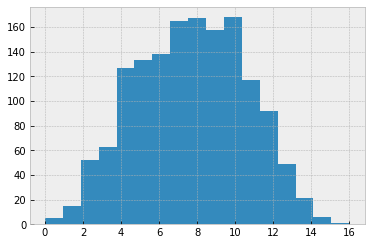

In [54]:
plt.hist(df['wins'], bins=17);

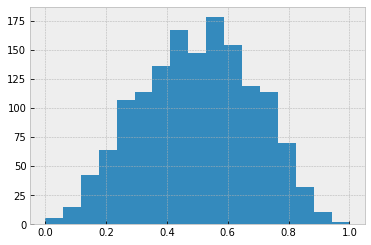

In [55]:
plt.hist(df['win_loss_perc'], bins=17);

### College EDA

In [56]:
college_stand_df.head()

,Rk,School,Conf,W,L,Pct,W.1,L.1,Pct.1,Off,Def,SRS,SOS,AP Pre,AP High,AP Rank,Notes,year
0,1,Clemson,ACC (Atlantic),11,0,1.000,8.0,0.0,1.000,45.9,10.7,20.66,-0.88,3.0,1.0,1.0,NaN,2019
1,2,Wake Forest,ACC (Atlantic),7,3,0.700,3.0,3.0,0.500,32.4,28.5,5.22,0.62,NaN,NaN,19.0,NaN,2019
2,3,Louisville,ACC (Atlantic),6,4,0.600,4.0,3.0,0.571,32.3,32.7,3.62,3.72,NaN,NaN,NaN,NaN,2019
3,4,Florida State,ACC (Atlantic),6,5,0.545,4.0,4.0,0.500,30.2,27.5,4.52,2.42,NaN,NaN,NaN,NaN,2019
4,5,Boston College,ACC (Atlantic),5,5,0.500,3.0,4.0,0.429,33.8,32.1,2.03,-0.07,NaN,NaN,NaN,NaN,2019


In [57]:
college_stand_df.columns

Index(['Rk', 'School', 'Conf', 'W', 'L', 'Pct', 'W.1', 'L.1', 'Pct.1', 'Off',
       'Def', 'SRS', 'SOS', 'AP Pre', 'AP High', 'AP Rank', 'Notes', 'year'],
      dtype='object')

In [58]:
college_stand_df.isnull().mean().sort_values(ascending = False)

Notes      0.988264
AP Pre     0.792889
AP Rank    0.785986
AP High    0.639627
Pct.1      0.037625
L.1        0.004833
W.1        0.004833
Pct        0.000000
School     0.000000
Conf       0.000000
W          0.000000
L          0.000000
year       0.000000
Off        0.000000
Def        0.000000
SRS        0.000000
SOS        0.000000
Rk         0.000000
dtype: float64

In [59]:
college_off_df.head()

,off_Rk,School,G,Pts,pass_cmp,pass_Att,cmp_Pct,pass_Yds,pass_TD,rush_Att,...,1st_down_Pass,1st_down_Rush,1st_down_Pen,1st_down_Tot,pen_No.,pen_Yds,Fum,Int,TO_Tot,year
0,1,Ohio State,10,51.5,19.0,27.8,68.3,254.3,3.8,46.6,...,11.8,14.5,2.3,28.6,5.8,56.2,0.8,0.1,0.9,2019
1,2,LSU,10,47.8,28.5,37.0,77.0,390.3,3.5,35.6,...,15.8,10.5,1.6,27.6,5.9,58.9,0.4,0.7,1.1,2019
2,3,Oklahoma,10,47.0,20.4,28.5,71.6,334.0,3.1,37.8,...,13.7,11.3,1.2,25.9,7.3,78.9,0.7,0.6,1.3,2019
3,4,Alabama,10,46.8,23.3,32.7,71.3,347.7,3.8,32.5,...,13.7,9.4,1.7,24.7,7.3,68.9,0.3,0.4,0.7,2019
4,5,Clemson,11,45.9,21.9,33.4,65.7,282.5,2.8,39.2,...,12.7,11.6,2.1,26.5,5.7,45.7,0.4,0.9,1.3,2019


In [60]:
college_off_df.columns

Index(['off_Rk', 'School', 'G', 'Pts', 'pass_cmp', 'pass_Att', 'cmp_Pct',
       'pass_Yds', 'pass_TD', 'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD',
       'Plays', 'Yds', 'Avg_Yds', '1st_down_Pass', '1st_down_Rush',
       '1st_down_Pen', '1st_down_Tot', 'pen_No.', 'pen_Yds', 'Fum', 'Int',
       'TO_Tot', 'year'],
      dtype='object')

In [61]:
college_off_df.isnull().mean().sort_values(ascending = False)

year             0.0
TO_Tot           0.0
School           0.0
G                0.0
Pts              0.0
pass_cmp         0.0
pass_Att         0.0
cmp_Pct          0.0
pass_Yds         0.0
pass_TD          0.0
rush_Att         0.0
rush_Yds         0.0
rush_Avg         0.0
rush_TD          0.0
Plays            0.0
Yds              0.0
Avg_Yds          0.0
1st_down_Pass    0.0
1st_down_Rush    0.0
1st_down_Pen     0.0
1st_down_Tot     0.0
pen_No.          0.0
pen_Yds          0.0
Fum              0.0
Int              0.0
off_Rk           0.0
dtype: float64

In [62]:
cdf

,Rk,School,Conf,W,L,Pct,W.1,L.1,Pct.1,Off,...,opp_Avg_Yds,opp_1st_down_Pass,opp_1st_down_Rush,opp_1st_down_Pen,opp_1st_down_Tot,opp_pen_No.,opp_pen_Yds,opp_Fum,opp_Int,opp_TO_Tot
0,1,Clemson,ACC (Atlantic),11,0,1.000,8.0,0.0,1.000,45.9,...,3.9,5.0,5.6,1.2,11.8,5.5,51.7,1.0,1.2,2.2
1,2,Wake Forest,ACC (Atlantic),7,3,0.700,3.0,3.0,0.500,32.4,...,5.8,11.4,8.1,1.2,20.7,6.2,52.9,0.8,1.0,1.8
2,3,Louisville,ACC (Atlantic),6,4,0.600,4.0,3.0,0.571,32.3,...,6.0,11.6,8.7,1.6,21.9,5.7,44.8,0.8,0.7,1.5
3,4,Florida State,ACC (Atlantic),6,5,0.545,4.0,4.0,0.500,30.2,...,5.3,12.8,8.7,3.0,24.5,7.2,61.1,0.7,0.7,1.5
4,5,Boston College,ACC (Atlantic),5,5,0.500,3.0,4.0,0.429,33.8,...,6.6,12.6,8.7,1.1,22.4,6.2,46.0,0.4,0.9,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,112,Tulsa,WAC,5,7,0.417,4.0,4.0,0.500,20.0,...,5.9,8.1,10.0,0.6,18.7,8.8,67.4,1.3,0.8,2.1
2424,113,Hawaii,WAC,3,9,0.250,2.0,6.0,0.250,24.5,...,5.3,8.0,12.1,1.9,22.0,8.0,66.2,1.2,1.0,2.2
2425,114,Rice,WAC,3,8,0.273,2.0,6.0,0.250,21.5,...,5.6,11.1,7.4,1.2,19.6,6.8,57.5,0.8,1.6,2.5
2426,115,SMU,WAC,3,9,0.250,2.0,6.0,0.250,15.1,...,5.7,9.3,6.8,1.6,17.6,8.1,69.0,0.8,0.7,1.5


## DataFrame Completion Exports

In [63]:
# Exporting team DataFrame
# team_df.to_csv('../data/NFL_teams.csv', index=False)

In [64]:
# Exporting pass DataFrame
# pass_df.to_csv('../data/NFL_passing.csv', index=False)

Exporting concatenated dfs for later use.

In [97]:
rec_df.to_csv('../data/Combined_Final_Data/recommender_data.csv', index=False)